Possibilité de tracer la section efficace détaillé d'un élément pour différents énergie de photon. 
Le problème est que l'énergie limite est de 700 keV.

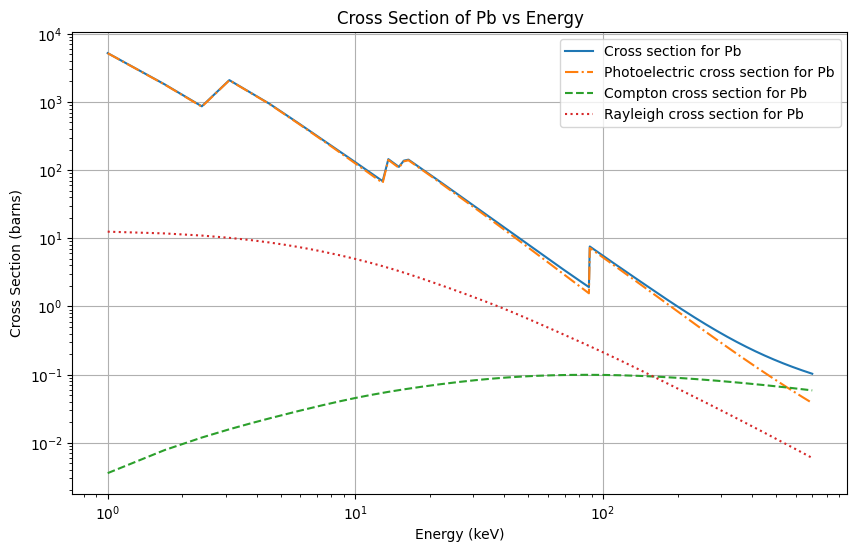

In [2]:
import xraylib as xrl

import numpy as np
import matplotlib.pyplot as plt

# plot the cross section for a given isotope for energy between 1 keV and 100 MeV
def plot_cross_section(isotope_symbol, energy_range=(1, 1e3)):
    energies = np.linspace(energy_range[0], energy_range[1], 1000)
    cross_sections = [xrl.CS_Total(xrl.SymbolToAtomicNumber(isotope_symbol), e) for e in energies]
    cross_sections_photo = [xrl.CS_Photo(xrl.SymbolToAtomicNumber(isotope_symbol), e) for e in energies]
    cross_sections_compton = [xrl.CS_Compt(xrl.SymbolToAtomicNumber(isotope_symbol), e) for e in energies]
    cross_sections_rayleigh = [xrl.CS_Rayl(xrl.SymbolToAtomicNumber(isotope_symbol), e) for e in energies]

    plt.figure(figsize=(10, 6))
    plt.plot(energies, cross_sections, label=f"Cross section for {isotope_symbol}")
    plt.plot(energies, cross_sections_photo, label=f"Photoelectric cross section for {isotope_symbol}", linestyle="-.")
    plt.plot(energies, cross_sections_compton, label=f"Compton cross section for {isotope_symbol}", linestyle="--")
    plt.plot(energies, cross_sections_rayleigh, label=f"Rayleigh cross section for {isotope_symbol}", linestyle=":")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Energy (keV)")
    plt.ylabel("Cross Section (barns)")
    plt.title(f"Cross Section of {isotope_symbol} vs Energy")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_cross_section("Pb", energy_range=(1, 700))